<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/deeplearning/sub_clasases_codes/%EA%BD%83_class_2%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dir = '/content/drive/MyDrive/tree_test/'

In [6]:
name = os.listdir(dir)
name

['잎을 무성하게 그린',
 '잎을 안 무성하게 그린',
 '잎이 없는',
 '잎이 큰',
 '잎이 안 큰',
 '윗쪽으로 뻗는',
 '윗쪽으로 안 뻗는',
 '열매있음',
 '열매없음',
 '그물 아닌',
 '꽃없음',
 '그물',
 '꽃있음']

In [8]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '꽃있음'))
_2.append(os.listdir(dir +'꽃없음'))
# _3.append(os.listdir(dir + '잎이 안 큰'))
# _4.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# _5.append(os.listdir(dir + '잎을 무성하게 그린'))
# _6.append(os.listdir(dir + '잎을 안 무성하게 그린'))

In [10]:
total_list = []
total_list.append(os.listdir(dir + '꽃있음'))
total_list.append(os.listdir(dir +'꽃없음'))
# total_list.append(os.listdir(dir + '잎이 안 큰'))
# total_list.append(os.listdir(dir + '윗쪽으로 안 뻗는'))
# total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
# total_list.append(os.listdir(dir + '잎을 안 무성하게 그린'))
# x = set(total_list)
print(total_list)

[['잎395.png', '잎394.png', '잎401.png', '잎559.png', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '68.jpg', '67.jpg'], ['잎1.png', '잎2.png', '잎5.png', '잎7.png', '잎8.png', '잎3.png', '잎6.png', '잎4.png', '잎9.png', '잎11.png', '잎10.png', '잎19.png', '잎15.png', '잎22.png', '잎23.png', '잎24.png', '잎21.png', '잎28.png', '잎26.png', '잎17.png', '잎13.png', '잎27.png', '잎29.png',

In [11]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['잎395.png', '잎394.png', '잎401.png', '잎559.png', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '68.jpg', '67.jpg', '잎1.png', '잎2.png', '잎5.png', '잎7.png', '잎8.png', '잎3.png', '잎6.png', '잎4.png', '잎9.png', '잎11.png', '잎10.png', '잎19.png', '잎15.png', '잎22.png', '잎23.png', '잎24.png', '잎21.png', '잎28.png', '잎26.png', '잎17.png', '잎13.png', '잎27.png', '잎29.png', 'ᄋ

In [12]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
# _3 = np.concatenate(_3).tolist()
# _4 = np.concatenate(_4).tolist()
# _5 = np.concatenate(_5).tolist()
# _6 = np.concatenate(_6).tolist()

In [13]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [14]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
# df3 = pd.DataFrame({
#     '_3' : _3
# })
# df4 = pd.DataFrame({
#     '_4' : _4
# })
# df5 = pd.DataFrame({
#     '_5' : _5
# })
# df6 = pd.DataFrame({
#     '_6' : _6
# })

In [15]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
# result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
# result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
# result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')
# result = pd.merge(result,df6, how='left', left_on='imgs', right_on='_6')

In [16]:
result = result.fillna(0)

In [17]:
result

,imgs,_1,_2
0,잎395.png,잎395.png,0
1,잎394.png,잎394.png,0
2,잎401.png,잎401.png,0
3,잎559.png,잎559.png,0
4,1.jpg,1.jpg,0
...,...,...,...
136,잎213.png,0,잎213.png
137,잎218.png,0,잎218.png
138,잎234.png,0,잎234.png
139,잎304.png,0,잎304.png


In [18]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)
# result['_4'] = result['_4'].apply(binary)
# result['_5'] = result['_5'].apply(binary)
# result['_6'] = result['_6'].apply(binary)

In [19]:
result

,imgs,_1,_2
0,잎395.png,1,0
1,잎394.png,1,0
2,잎401.png,1,0
3,잎559.png,1,0
4,1.jpg,1,0
...,...,...,...
136,잎213.png,0,1
137,잎218.png,0,1
138,잎234.png,0,1
139,잎304.png,0,1


In [20]:
result.columns = ['imgs','꽃있음', '꽃없음']

In [21]:
result1 = result.copy()

In [ ]:
# def chage(data):
#     if data == 1:
#         data = 0
#         return data
#     else:
#         data = 1
#         return data
# result1['잎을 무성하게 그린'] = result1['잎을 무성하게 그린'].apply(chage)

# result['_2'] = result['_2'].apply(binary)
# result['_3'] = result['_3'].apply(binary)

In [ ]:
# def chage2(data):
#     if data == 1:
#         data = 2
#         return data
#     else:
#         data = 0
#         return data
# result['잎을 안 무성하게 그린'] = result['잎을 안 무성하게 그린'].apply(chage2)

In [ ]:
result1.iloc[101:120]

,imgs,윗쪽으로 안 뻗는,윗쪽으로 뻗는


In [22]:
data_1 = result1[['imgs','꽃있음']]
data_1.columns = ['imgs','잎']

In [23]:
data_1

,imgs,잎
0,잎395.png,1
1,잎394.png,1
2,잎401.png,1
3,잎559.png,1
4,1.jpg,1
...,...,...
136,잎213.png,0
137,잎218.png,0
138,잎234.png,0
139,잎304.png,0


In [24]:
data_1['잎'].value_counts()

0    71
1    70
Name: 잎, dtype: int64

In [25]:
import sklearn
data_merge2_shuffled = sklearn.utils.shuffle(data_1)

In [26]:
data_merge2_shuffled

,imgs,잎
2,잎401.png,1
115,잎51.png,0
74,잎8.png,0
18,16.jpg,1
94,잎14.png,0
...,...,...
59,58.jpg,1
64,63.jpg,1
83,잎22.png,0
31,30.jpg,1


In [27]:
data = data_merge2_shuffled

In [28]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=1, stratify=data['잎'])

In [29]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 112
Test  set rows: 29


In [30]:
IMAGE_PATH = '/content/drive/MyDrive/total/'

In [31]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [32]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['잎'], drop_first=False)
    return X, y

In [33]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [34]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 300, 300, 3)
(112, 2)
(29, 300, 300, 3)
(29, 2)


In [35]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [36]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.9 MB/s eta 0:00:00


In [37]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [ ]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 4s 0us/step


In [38]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(2, activation='softmax')(base_model.layers[-2].output)

NameError: ignored

In [39]:
# model = Model(inputs=base_model.input, outputs=net)


model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 32)       0

In [40]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 296, 296, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 32)       0

In [42]:
%mkdir /content/drive/MyDrive/models/
%mkdir /content/drive/MyDrive/models/꽃/
%mkdir /content/drive/MyDrive/models/꽃/check_point
checkpoint_path = "/content/drive/MyDrive/models/꽃/check_point/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

mkdir: cannot create directory ‘/content/drive/MyDrive/models/’: File exists


In [50]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=30)
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=7*10)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=6,
    verbose=VERBOSE,
    validation_split=0.2,
    callbacks=[early_stopping, cp_callback]
)

Epoch 1/200
15/15 [==============================] - 0s 15ms/step - loss: 0.0161 - accuracy: 0.9888 - val_loss: 13.8667 - val_accuracy: 0.4348
Epoch 2/200
15/15 [==============================] - 0s 13ms/step - loss: 0.0884 - accuracy: 0.9888 - val_loss: 11.0665 - val_accuracy: 0.4348
Epoch 3/200
15/15 [==============================] - 0s 12ms/step - loss: 0.0803 - accuracy: 0.9775 - val_loss: 7.9821 - val_accuracy: 0.5217
Epoch 4/200
15/15 [==============================] - 0s 12ms/step - loss: 0.0281 - accuracy: 0.9888 - val_loss: 7.6281 - val_accuracy: 0.5217
Epoch 5/200
 7/15 [=============>................] - ETA: 0s - loss: 3.7996e-04 - accuracy: 1.0000
Epoch 5: saving model to /content/drive/MyDrive/models/꽃/check_point/cp-0005.ckpt
15/15 [==============================] - 0s 24ms/step - loss: 0.0167 - accuracy: 0.9888 - val_loss: 7.3587 - val_accuracy: 0.6087
Epoch 6/200
15/15 [==============================] - 0s 12ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 6.807

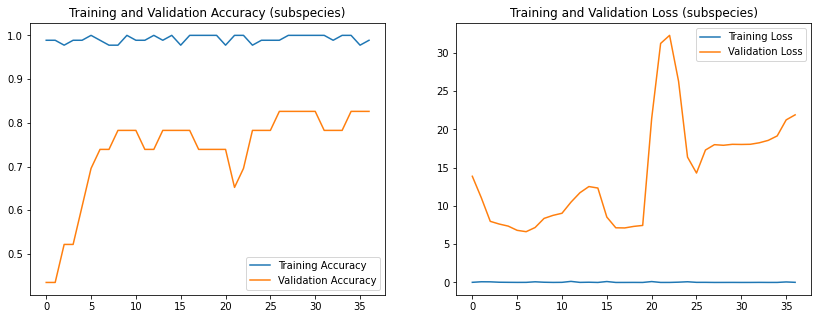

In [51]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [52]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 35ms/step - loss: 0.9075 - accuracy: 0.9310


[0.9074639678001404, 0.931034505367279]

In [53]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 203ms/step


In [54]:
np.argmax(predictions[2])

0

In [55]:
y_test

,0,1
102,1,0
49,0,1
30,0,1
44,0,1
131,1,0
31,0,1
77,1,0
74,1,0
64,0,1
99,1,0


In [56]:
%cd /content/drive/MyDrive/models/꽃/
from keras.models import load_model
model.save('꽃_model.h5')

/content/drive/MyDrive/models/꽃
